In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anomaly-detection/Submission.csv
/kaggle/input/anomaly-detection/train.csv
/kaggle/input/anomaly-detection/test.csv


In [2]:
test=pd.read_csv("/kaggle/input/anomaly-detection/test.csv")
train=pd.read_csv("/kaggle/input/anomaly-detection/train.csv")

# 1. understanding the dataset

In [3]:
train.head() 

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


In [4]:
train.shape

(15830, 4)

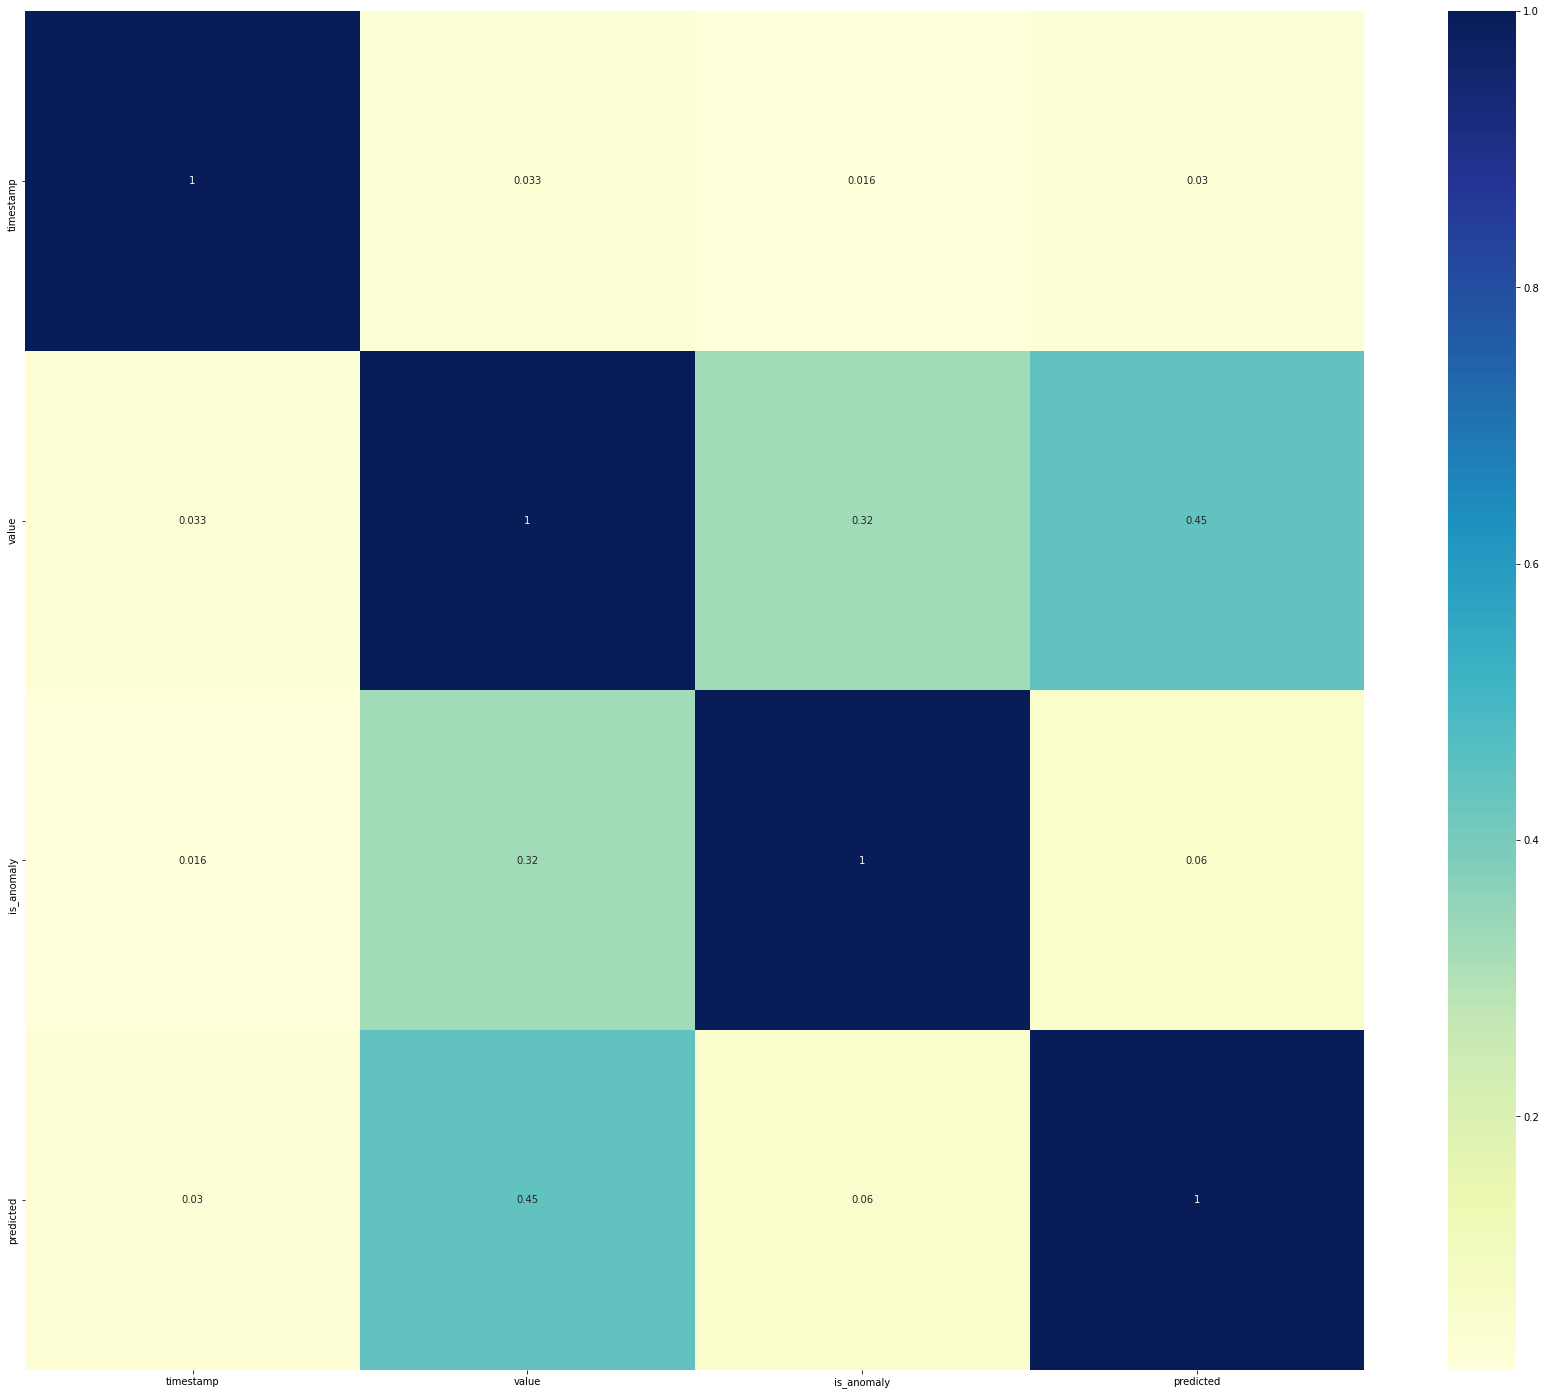

In [5]:
plt.figure(figsize = (30, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Cleaning data

In [6]:
#duplicated value
train.duplicated().sum()

0

In [7]:
train.isna().sum()

timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64

<AxesSubplot:>

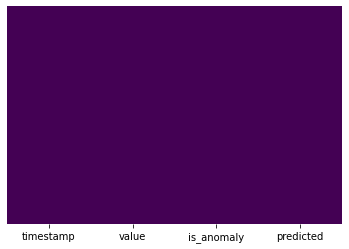

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
label=train['is_anomaly']
data=train.drop(['is_anomaly'],axis=1)
print(data.shape)

(15830, 3)


In [10]:
label.value_counts()

False    15054
True       776
Name: is_anomaly, dtype: int64

# XGBoost

In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
x_train1,x_test1,train_label,test_label=train_test_split(data,label,test_size=0.50, random_state=1)

from xgboost import XGBClassifier
clf=XGBClassifier(learning_rate=1, n_estimators=1300,eta = 0.7, 
    max_depth= 3,  
    objective= 'multi:softprob',  
    num_class= 3)

# gamma auto uses 1 / n_features
import time
debut=time.time()
#fit permet de faire le train de modele 
clf.fit(x_train1,train_label)
fin=time.time()-debut
#pred predection selon database
pred=clf.predict(test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:02:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


**===> unbalanced data**

# oversamling technique

In [12]:
"""# check version number
import imblearn
print(imblearn.__version__)

from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=1.0)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(data, label)

#compter combien de 1 et de 0 dans dataset
y_over.value_counts()"""


"# check version number\nimport imblearn\nprint(imblearn.__version__)\n\nfrom imblearn.over_sampling import RandomOverSampler\n\n# define oversampling strategy\noversample = RandomOverSampler(sampling_strategy='minority')\n\n# define oversampling strategy\noversample = RandomOverSampler(sampling_strategy=1.0)\n\n# fit and apply the transform\nX_over, y_over = oversample.fit_resample(data, label)\n\n#compter combien de 1 et de 0 dans dataset\ny_over.value_counts()"

In [13]:
"""data=X_over
label=y_over"""

'data=X_over\nlabel=y_over'

In [14]:
"""from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dtree = DecisionTreeClassifier()
x_train,x_test,y_train,y_test = train_test_split(data,label,test_size = 0.3,random_state = 0)
import time
debut=time.time()
dtree.fit(x_train,y_train)
fin=time.time()-debut
prediction = dtree.predict(test)"""

'from sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import train_test_split\ndtree = DecisionTreeClassifier()\nx_train,x_test,y_train,y_test = train_test_split(data,label,test_size = 0.3,random_state = 0)\nimport time\ndebut=time.time()\ndtree.fit(x_train,y_train)\nfin=time.time()-debut\nprediction = dtree.predict(test)'

In [15]:
"""import xgboost as xgb
from sklearn.model_selection import train_test_split
x_train1,x_test1,train_label,test_label=train_test_split(data,label,test_size=0.33,random_state=0)

from xgboost import XGBClassifier
clf=XGBClassifier(learning_rate=1, n_estimators=1300,eta = 0.7, 
    max_depth= 3,  
    objective= 'multi:softprob',  
    num_class= 3)

# gamma auto uses 1 / n_features
import time
debut=time.time()
#fit permet de faire le train de modele 
clf.fit(x_train1,train_label)
fin=time.time()-debut
#pred predection selon database
pred=clf.predict(test)"""

"import xgboost as xgb\nfrom sklearn.model_selection import train_test_split\nx_train1,x_test1,train_label,test_label=train_test_split(data,label,test_size=0.33,random_state=0)\n\nfrom xgboost import XGBClassifier\nclf=XGBClassifier(learning_rate=1, n_estimators=1300,eta = 0.7, \n    max_depth= 3,  \n    objective= 'multi:softprob',  \n    num_class= 3)\n\n# gamma auto uses 1 / n_features\nimport time\ndebut=time.time()\n#fit permet de faire le train de modele \nclf.fit(x_train1,train_label)\nfin=time.time()-debut\n#pred predection selon database\npred=clf.predict(test)"

In [16]:
"""from sklearn.metrics import confusion_matrix
CM=confusion_matrix(test_label,pred)
print(CM)

#heatmap de confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
# CM1=pd.DataFrame(CM)
# print(CM1)
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')"""

'from sklearn.metrics import confusion_matrix\nCM=confusion_matrix(test_label,pred)\nprint(CM)\n\n#heatmap de confusion matrix\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nclass_names=[0,1] # name of classes\nfig, ax = plt.subplots()\ntick_marks = np.arange(len(class_names))\nplt.xticks(tick_marks, class_names)\nplt.yticks(tick_marks, class_names)\n# create heatmap\n# CM1=pd.DataFrame(CM)\n# print(CM1)\nsns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt=\'g\')\nax.xaxis.set_label_position("top")\n#plt.tight_layout()\nplt.title(\'Confusion matrix\', y=1.1)\nplt.ylabel(\'Actual label\')\nplt.xlabel(\'Predicted label\')'

In [17]:
"""from sklearn.metrics import classification_report
print(classification_report(test_label,pred))"""

'from sklearn.metrics import classification_report\nprint(classification_report(test_label,pred))'

In [18]:
data={"timestamp":[],"is_anomaly":[]}
for id,pred in zip(test["timestamp"].unique(),pred):
  data["timestamp"].append(id)
  data["is_anomaly"].append(pred)


In [19]:
output=pd.DataFrame(data,columns=["timestamp","is_anomaly"])
output

,timestamp,is_anomaly
0,1396332000,False
1,1396332300,False
2,1396332600,False
3,1396332900,False
4,1396333200,False
...,...,...
3955,1397518500,False
3956,1397518800,False
3957,1397519100,False
3958,1397519400,False


In [20]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
output['is_anomaly'].value_counts()

Your submission was successfully saved!


False    3950
True       10
Name: is_anomaly, dtype: int64